# **Parte 4: Analisis final** 

Objetivo: realizar un analisis de marketing para una ciudad 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import pandas as pd
# Cargar variables de entorno
from dotenv import load_dotenv

In [2]:
df_clientes_analisis = pd.read_csv('df_clientes_limpio.csv')

In [3]:
df_clientes_analisis.head()

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,tipo_de_pago_mas_usado,ingresos_mensuales
0,31,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,Efectivo,6425.0
1,40,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,Efectivo,2374.0
2,62,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,Efectivo,1110.0
3,41,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,Tarjeta,6931.0
4,49,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,Tarjeta,1350.0


In [4]:
df_clientes_analisis_sandiego = df_clientes_analisis[df_clientes_analisis['ciudad_residencia'] == 'San Diego']

In [5]:
df_clientes_analisis_sandiego.head()

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,tipo_de_pago_mas_usado,ingresos_mensuales
4,49,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,Tarjeta,1350.0
38,60,Masculino,San Diego,Muy Alto,5,83.97,No,Sí,Carnes,Sí,App,10814.0
42,54,Masculino,San Diego,Alto,6,14.54,Sí,Sí,Carnes,No,Tarjeta,6093.0
55,50,Femenino,San Diego,Alto,5,18.13,No,Sí,Vegetariano,No,Tarjeta,6607.0
59,26,Masculino,San Diego,Medio,2,33.36,Sí,Sí,Pescado,No,App,2618.0


In [6]:
df_clientes_analisis_sandiego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3075 entries, 4 to 29997
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       3075 non-null   int64  
 1   genero                     3075 non-null   object 
 2   ciudad_residencia          3075 non-null   object 
 3   estrato_socioeconomico     3075 non-null   object 
 4   frecuencia_visita          3075 non-null   int64  
 5   promedio_gasto_comida      3075 non-null   float64
 6   ocio                       3075 non-null   object 
 7   consume_licor              3075 non-null   object 
 8   preferencias_alimenticias  3075 non-null   object 
 9   membresia_premium          3075 non-null   object 
 10  tipo_de_pago_mas_usado     3075 non-null   object 
 11  ingresos_mensuales         3075 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 312.3+ KB


Eliminar columna ciudad_residencia, por que vamos a trabajar con una sola ciudad

In [7]:
df_clientes_analisis_sandiego = df_clientes_analisis_sandiego.drop(columns=['ciudad_residencia'])


dataset con datos de la ciudad de sandiego

In [8]:
df_clientes_analisis_sandiego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3075 entries, 4 to 29997
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       3075 non-null   int64  
 1   genero                     3075 non-null   object 
 2   estrato_socioeconomico     3075 non-null   object 
 3   frecuencia_visita          3075 non-null   int64  
 4   promedio_gasto_comida      3075 non-null   float64
 5   ocio                       3075 non-null   object 
 6   consume_licor              3075 non-null   object 
 7   preferencias_alimenticias  3075 non-null   object 
 8   membresia_premium          3075 non-null   object 
 9   tipo_de_pago_mas_usado     3075 non-null   object 
 10  ingresos_mensuales         3075 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 288.3+ KB


In [9]:
df_yelp_sandiego = pd.read_csv('df_yelp_limpio.csv')

In [10]:
df_yelp_sandiego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    730 non-null    object 
 1   is_closed               730 non-null    bool   
 2   review_count            730 non-null    int64  
 3   rating                  730 non-null    float64
 4   price                   730 non-null    object 
 5   distance                730 non-null    float64
 6   num_transactions        730 non-null    int64  
 7   pickup                  730 non-null    object 
 8   delivery                730 non-null    object 
 9   restaurant_reservation  730 non-null    object 
 10  category_title          730 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 57.9+ KB


Estadísticas descriptivas de las columnas numéricas:
              edad  frecuencia_visita  promedio_gasto_comida  \
count  3075.000000        3075.000000            3075.000000   
mean     48.539187           4.690732              34.741759   
std      18.050335           2.237877              26.539621   
min      18.000000           0.000000               0.000000   
25%      33.000000           3.000000              14.520000   
50%      49.000000           5.000000              28.500000   
75%      64.000000           6.000000              48.865000   
max      80.000000          10.000000             119.980000   

       ingresos_mensuales  
count         3075.000000  
mean          6087.037073  
std           4633.095164  
min            801.000000  
25%           2289.500000  
50%           4760.000000  
75%           8512.000000  
max          17989.000000  


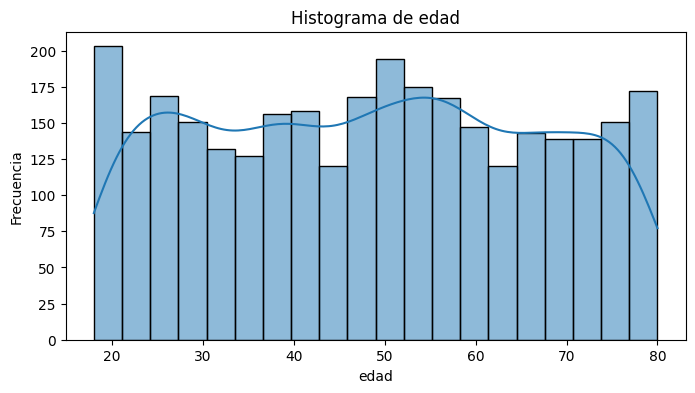

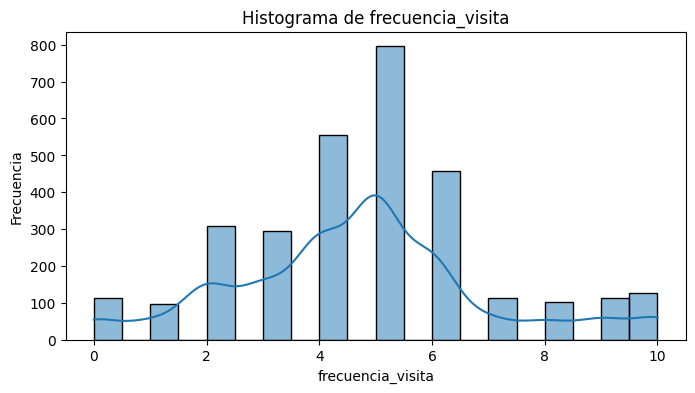

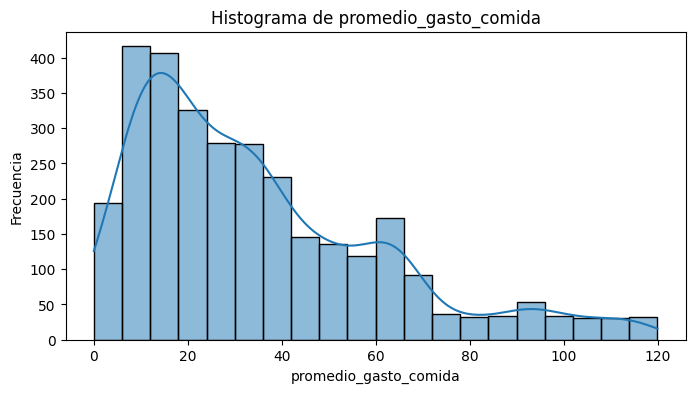

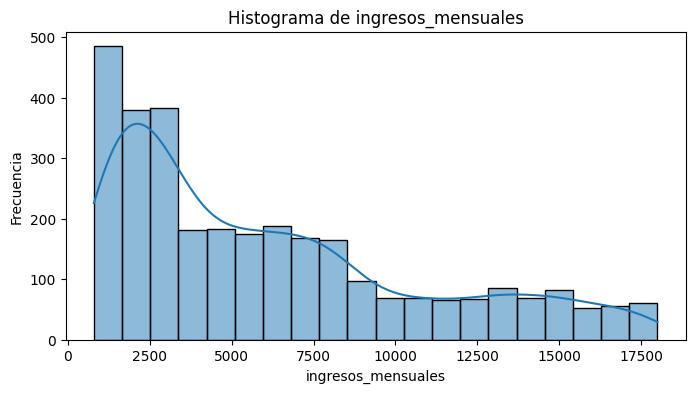

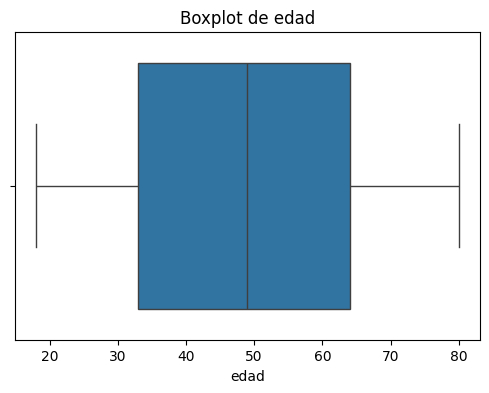

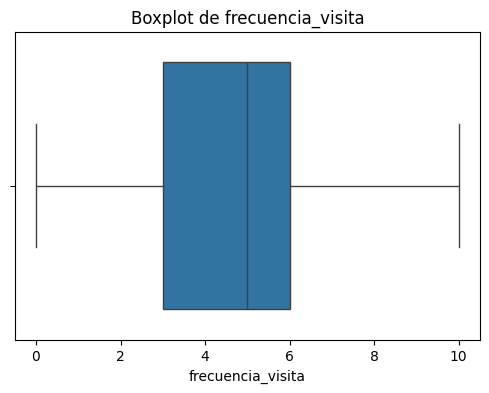

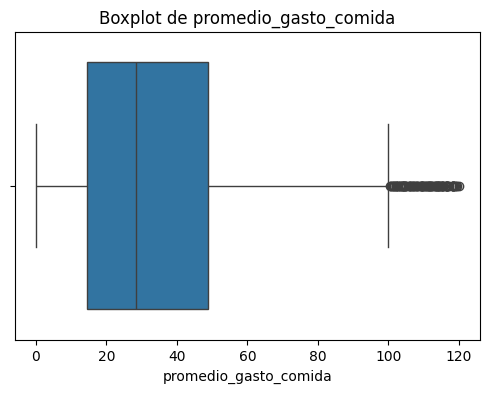

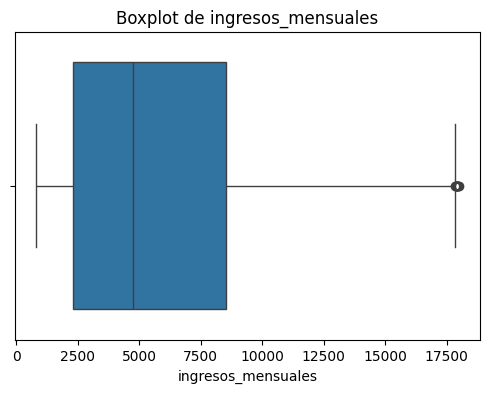

In [11]:
# Columnas numéricas
columnas_numericas = [
    'edad',
    'frecuencia_visita',
    'promedio_gasto_comida',
    'ingresos_mensuales'
]

# 1️⃣ Estadísticas descriptivas
print("Estadísticas descriptivas de las columnas numéricas:")
print(df_clientes_analisis_sandiego[columnas_numericas].describe())

# 2️⃣ Histogramas
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clientes_analisis_sandiego[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# 3️⃣ Boxplots
for col in columnas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clientes_analisis_sandiego[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

📊 Conclusiones por variable numérica

1. Edad

La edad mínima es 18 y la máxima 80, lo cual indica que los clientes abarcan adultos jóvenes hasta adultos mayores.

La media (48.5 años) y la mediana (49 años) muestran que la mayoría de los clientes están en edad adulta media.

La dispersión (σ = 18.05) es alta, lo que indica gran diversidad generacional en los clientes.

👉 Conclusión: el negocio atiende un rango etario amplio, pero con concentración en adultos de mediana edad.

2. Frecuencia de visita

Rango de 0 a 10 visitas.

La mediana (5) y la media (4.7) indican que los clientes suelen visitar entre 4 y 5 veces en el periodo considerado.

El desvío estándar (σ = 2.23) muestra una variabilidad moderada.

👉 Conclusión: la mayoría son clientes de visitas regulares, con pocos extremos (muy bajas o muy altas frecuencias).

3. Promedio de gasto en comida

Varía entre 0 y 120 unidades monetarias.

El gasto promedio es de 34.7, pero la mediana (28.5) muestra que el gasto típico es algo menor.

El rango intercuartílico (Q1 = 14.5, Q3 = 48.8) indica que el 50% central gasta entre 15 y 49.

Existe dispersión importante (σ = 26.5) → hay clientes de bajo y de alto gasto.

👉 Conclusión: el gasto es heterogéneo, con presencia de clientes ahorradores y otros con gasto premium.

4. Ingresos mensuales

Van de 801 a 17,989.

El ingreso medio es de 6,087, y la mediana de 4,760 → hay clientes con ingresos altos que sesgan la media hacia arriba.

El 50% central tiene ingresos entre 2,289 y 8,512, lo cual muestra diversidad socioeconómica.

La alta desviación estándar (σ = 4,633) confirma gran desigualdad en ingresos.

👉 Conclusión: la base de clientes combina sectores medios con minorías de altos ingresos, lo que puede segmentarse en estrategias diferenciadas.

✅ Conclusión general:
Los clientes presentan diversidad en edad y nivel de ingresos, lo que sugiere una base heterogénea. Sin embargo, el comportamiento en frecuencia de visita es relativamente homogéneo (alrededor de 4–5 veces). El gasto en comida refleja esa diferencia de ingresos: mientras algunos clientes gastan muy poco, otros gastan hasta 4 veces la mediana.


=== GENERO ===
Frecuencia absoluta:
genero
Femenino     1567
Masculino    1508
Name: count, dtype: int64

Frecuencia relativa (%):
genero
Femenino     50.96
Masculino    49.04
Name: proportion, dtype: float64

=== ESTRATO_SOCIOECONOMICO ===
Frecuencia absoluta:
estrato_socioeconomico
Alto        1091
Medio        822
Muy Alto     698
Bajo         464
Name: count, dtype: int64

Frecuencia relativa (%):
estrato_socioeconomico
Alto        35.48
Medio       26.73
Muy Alto    22.70
Bajo        15.09
Name: proportion, dtype: float64

=== OCIO ===
Frecuencia absoluta:
ocio
No    1569
Sí    1506
Name: count, dtype: int64

Frecuencia relativa (%):
ocio
No    51.02
Sí    48.98
Name: proportion, dtype: float64

=== CONSUME_LICOR ===
Frecuencia absoluta:
consume_licor
Sí    1901
No    1174
Name: count, dtype: int64

Frecuencia relativa (%):
consume_licor
Sí    61.82
No    38.18
Name: proportion, dtype: float64

=== PREFERENCIAS_ALIMENTICIAS ===
Frecuencia absoluta:
preferencias_alimenticias
Carne

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


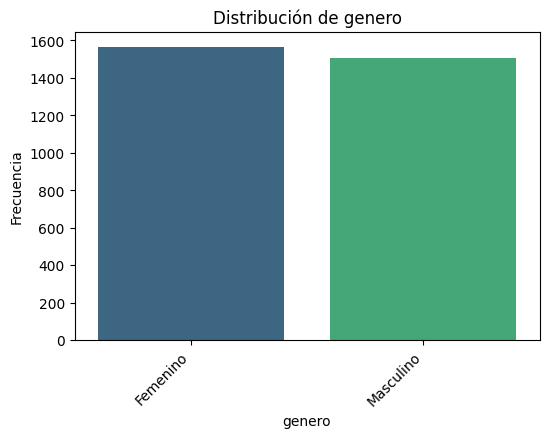

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


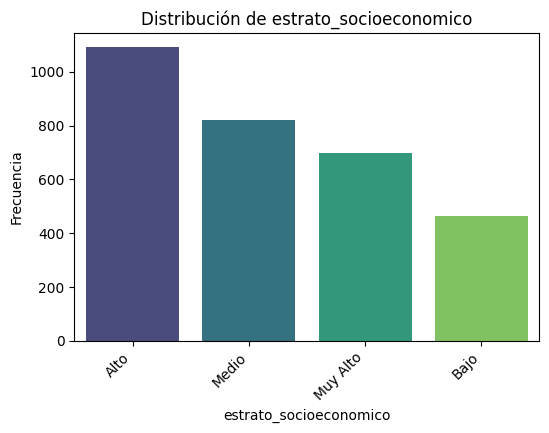

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


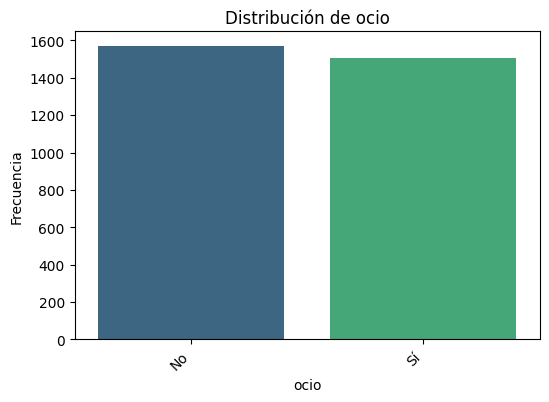

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


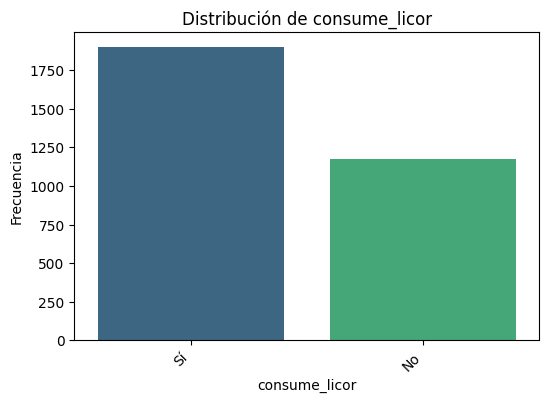

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


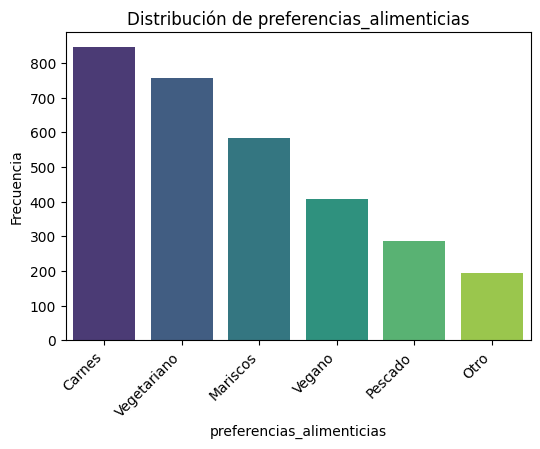

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


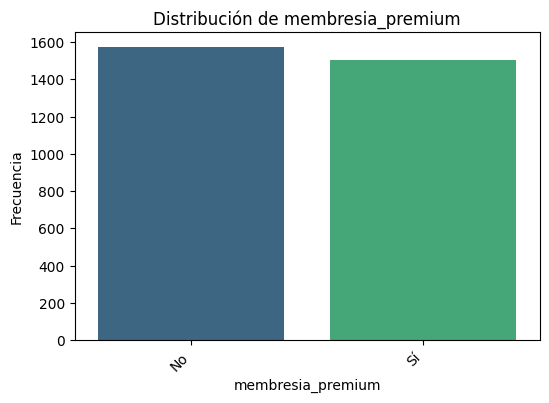

C:\Users\hola\AppData\Local\Temp\ipykernel_5812\578854930.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


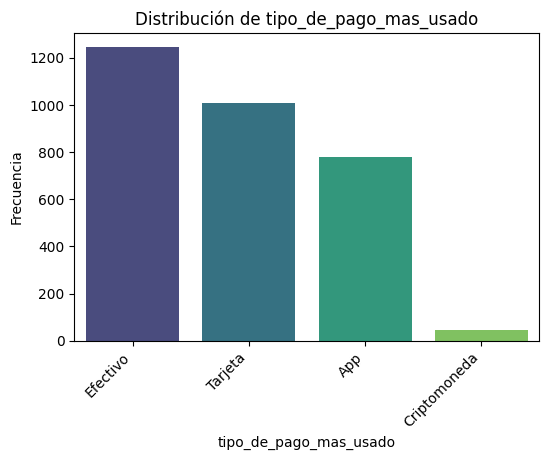

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas categóricas
columnas_categoricas = [
    'genero',
    'estrato_socioeconomico',
    'ocio',
    'consume_licor',
    'preferencias_alimenticias',
    'membresia_premium',
    'tipo_de_pago_mas_usado'
]

# ================================
# 1. Mostrar todas las estadísticas descriptivas (frecuencias)
# ================================
for col in columnas_categoricas:
    print(f"\n=== {col.upper()} ===")
    
    # Frecuencia absoluta
    print("Frecuencia absoluta:")
    print(df_clientes_analisis_sandiego[col].value_counts())
    
    # Frecuencia relativa (%)
    print("\nFrecuencia relativa (%):")
    print((df_clientes_analisis_sandiego[col].value_counts(normalize=True) * 100).round(2))


# ================================
# 2. Graficar cada columna (después)
# ================================
for col in columnas_categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(
        data=df_clientes_analisis_sandiego,
        x=col,
        order=df_clientes_analisis_sandiego[col].value_counts().index,
        palette="viridis",
        legend=False   # evita el warning
    )
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.show()


📊 Conclusiones de las columnas categóricas

1. Género

Distribución casi equilibrada: Femenino 50.96%, Masculino 49.04%.
👉 Conclusión: el negocio llega por igual a hombres y mujeres, por lo que no se requiere ajustar campañas solo por género.

2. Estrato socioeconómico

La mayoría de los clientes se concentran en estratos Alto (35.48%) y Medio (26.73%), seguidos por Muy Alto (22.70%) y Bajo (15.09%).
👉 Conclusión: el público principal proviene de estratos medios y altos, lo que sugiere una base con cierto poder adquisitivo, pero hay también un segmento menor de estratos bajos.

3. Ocio

Distribución casi pareja: No 51.02%, Sí 48.98%.
👉 Conclusión: aproximadamente la mitad de los clientes reporta interés en ocio, indicando que las campañas relacionadas con entretenimiento o actividades complementarias podrían atraer a un segmento amplio.

4. Consume licor

Sí 61.82%, No 38.18%.
👉 Conclusión: la mayoría de los clientes consume licor, por lo que la oferta de bebidas alcohólicas es relevante y estratégica para retener clientes.

5. Preferencias alimenticias

Principales preferencias: Carnes (27.51%), Vegetariano (24.59%), Mariscos (18.99%), seguidas de Vegano (13.24%), Pescado (9.37%), Otro (6.31%).
👉 Conclusión: el menú debería enfocarse principalmente en carnes, opciones vegetarianas y mariscos, mientras que se puede ofrecer una menor pero significativa variedad para veganos y pescados.

6. Membresía premium

Distribución casi pareja: No 51.15%, Sí 48.85%.
👉 Conclusión: casi la mitad de los clientes tiene membresía premium, lo que indica que las estrategias de fidelización y beneficios exclusivos pueden ser efectivas para un gran segmento.

7. Tipo de pago más usado

Efectivo 40.46%, Tarjeta 32.72%, App 25.37%, Criptomoneda 1.46%.
👉 Conclusión: la mayoría prefiere efectivo o tarjeta, pero un segmento importante usa apps digitales. La criptomoneda es marginal, por lo que no es prioritaria.

✅ Conclusión general de todas las categóricas:

La base de clientes es heterogénea en términos de socioeconomía y hábitos, pero con un perfil predominante de estratos medios-altos, consumidores de licor y con preferencias claras en carnes, vegetarianas y mariscos.

La distribución de género, ocio y membresía premium es equilibrada, lo que sugiere que las campañas pueden ser amplias y generalistas, pero con enfoque en hábitos de consumo y pago.